In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Reading Data

In [20]:
df = pd.read_csv('kyoto.csv')


In [21]:
df.head()
# for col in df.columns: 
#     print(col) 

,Duration,Service,Source_bytes,Destination_bytes,Count,Same_srv_rate,Serror_rate,Srv_serror_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_src_port_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Flag,Label,Source_Port_Number,Destination_Port_Number,protocol_type
86848,0.000000,other,0,0,0,0.0,0.0,1.0,0,0,0.00,0.00,0.00,S0,-1,56313,80,tcp
273287,2.999473,other,0,0,0,0.0,0.0,0.8,0,4,0.00,0.00,1.00,S0,-1,60893,23,tcp
377838,0.000449,dns,44,104,12,1.0,0.0,0.0,84,98,0.00,0.00,0.00,SF,-1,26409,53,udp
319624,0.000530,dns,44,104,18,1.0,0.0,0.0,9,100,0.00,0.00,0.00,SF,1,39915,53,udp
23836,0.000000,dns,0,0,1,1.0,0.0,0.4,12,24,0.08,0.17,0.08,SHR,-1,59703,53,udp


# Data Preprocessing

In [22]:
def isNumber(s): 

    # try to convert the string to int 
    try: 
        flag = s.isnumeric() 
        return flag
    # catch exception if cannot be converted 
    except AttributeError: 
        return False

In [23]:
dummy_cols = ['Service' , 'Flag' , 'protocol_type']
df = pd.get_dummies( df , columns = dummy_cols)

In [24]:
# df['IDS_detection'].replace( to_replace='0' , value = 0 )


# for x in df['IDS_detection']: 
#     if ( x == 0 ):
#         continue
#     else:
#         df['IDS_detection'].replace( to_replace=x , value = 1 )

# df['IDS_detection'] = df['IDS_detection'].replace(to_replace=r"^(.(?<!0))*?$", value='Turf',regex=True)

In [25]:
# for x in df['Malware_detection']: 
#     if ( x != 0 or x != '0' ):
#         df.at[x,'Malware_detection'] = 1

# df['Malware_detection'].replace( to_replace='0' , value = 0 )


# for x in df['Malware_detection']: 
#     if ( x == 0 ):
#         continue
#     else:
#         df['Malware_detection'].replace( to_replace=x , value = 1 )

In [26]:
# for x in df['Ashula_detection']: 
#     if ( x != 0 or x != '0' ):
#         df.at[x,'Ashula_detection'] = 1

# df['Ashula_detection'].replace( to_replace='0' , value = 0 )


# for x in df['Ashula_detection']: 
#     if ( x == 0 ):
#         continue
#     else:
#         df['Ashula_detection'].replace( to_replace=x , value = 1 )

In [27]:
# from sklearn import preprocessing

# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled)

In [28]:
df.isna().sum()

Duration                       0
Source_bytes                   0
Destination_bytes              0
Count                          0
Same_srv_rate                  0
Serror_rate                    0
Srv_serror_rate                0
Dst_host_count                 0
Dst_host_srv_count             0
Dst_host_same_src_port_rate    0
Dst_host_serror_rate           0
Dst_host_srv_serror_rate       0
Label                          0
Source_Port_Number             0
Destination_Port_Number        0
Service_dns                    0
Service_http                   0
Service_other                  0
Service_rdp                    0
Service_smtp                   0
Service_snmp                   0
Service_ssh                    0
Flag_OTH                       0
Flag_REJ                       0
Flag_RSTO                      0
Flag_RSTR                      0
Flag_RSTRH                     0
Flag_S0                        0
Flag_SF                        0
Flag_SH                        0
Flag_SHR  

In [29]:
df = df.dropna()
df.isna().sum()

Duration                       0
Source_bytes                   0
Destination_bytes              0
Count                          0
Same_srv_rate                  0
Serror_rate                    0
Srv_serror_rate                0
Dst_host_count                 0
Dst_host_srv_count             0
Dst_host_same_src_port_rate    0
Dst_host_serror_rate           0
Dst_host_srv_serror_rate       0
Label                          0
Source_Port_Number             0
Destination_Port_Number        0
Service_dns                    0
Service_http                   0
Service_other                  0
Service_rdp                    0
Service_smtp                   0
Service_snmp                   0
Service_ssh                    0
Flag_OTH                       0
Flag_REJ                       0
Flag_RSTO                      0
Flag_RSTR                      0
Flag_RSTRH                     0
Flag_S0                        0
Flag_SF                        0
Flag_SH                        0
Flag_SHR  


# Split Data

In [30]:
X = df.drop(columns = ['Label'] , axis = 1 )
y = df['Label']
# y = df.iloc[:, 38]
# X = df.drop('label' , 1)

In [31]:
scoring_metrics={'accuracy' }

In [32]:
df.head()

,Duration,Source_bytes,Destination_bytes,Count,Same_srv_rate,Serror_rate,Srv_serror_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_src_port_rate,...,Flag_RSTO,Flag_RSTR,Flag_RSTRH,Flag_S0,Flag_SF,Flag_SH,Flag_SHR,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
86848,0.000000,0,0,0,0.0,0.0,1.0,0,0,0.00,...,0,0,0,1,0,0,0,0,1,0
273287,2.999473,0,0,0,0.0,0.0,0.8,0,4,0.00,...,0,0,0,1,0,0,0,0,1,0
377838,0.000449,44,104,12,1.0,0.0,0.0,84,98,0.00,...,0,0,0,0,1,0,0,0,0,1
319624,0.000530,44,104,18,1.0,0.0,0.0,9,100,0.00,...,0,0,0,0,1,0,0,0,0,1
23836,0.000000,0,0,1,1.0,0.0,0.4,12,24,0.08,...,0,0,0,0,0,0,1,0,0,1


In [33]:
y.shape

(1000,)

In [34]:
y.head()

86848    -1
273287   -1
377838   -1
319624    1
23836    -1
Name: Label, dtype: int64

In [40]:
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
#model = DecisionTreeClassifier()

model.fit(X, y)

importances = model.feature_importances_

In [42]:
import numpy as np
import matplotlib.pyplot as plt

std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.356788)
2. feature 3 (0.151717)
3. feature 16 (0.124108)
4. feature 26 (0.114229)
5. feature 2 (0.101446)
6. feature 12 (0.088971)
7. feature 1 (0.027759)
8. feature 9 (0.015841)
9. feature 4 (0.009640)
10. feature 10 (0.009502)
11. feature 13 (0.000000)
12. feature 11 (0.000000)
13. feature 6 (0.000000)
14. feature 8 (0.000000)
15. feature 15 (0.000000)
16. feature 5 (0.000000)
17. feature 14 (0.000000)
18. feature 32 (0.000000)
19. feature 31 (0.000000)
20. feature 17 (0.000000)
21. feature 18 (0.000000)
22. feature 19 (0.000000)
23. feature 20 (0.000000)
24. feature 21 (0.000000)
25. feature 22 (0.000000)
26. feature 23 (0.000000)
27. feature 24 (0.000000)
28. feature 25 (0.000000)
29. feature 27 (0.000000)
30. feature 28 (0.000000)
31. feature 29 (0.000000)
32. feature 30 (0.000000)
33. feature 0 (0.000000)


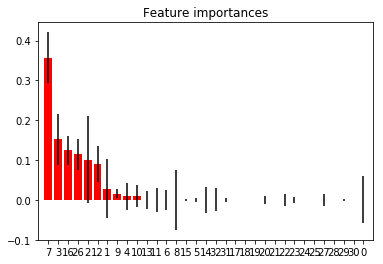

In [43]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()